<a href="https://colab.research.google.com/github/Kaderbalde/Data_Collection/blob/main/Mamadou_Cir%C3%A9_Kader_Bald%C3%A9_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercice 1 - Feature scaling**


1.  **Expliquez en une phrase pourquoi le feature scaling est nécessaire:**
C'est pour éviter que certaines variables aient un impact disprpoprtionné sur l'algorithme d'apprentissage en raison de leurs échelles différentes par rapport aux autres variables.





2.  Citez au moins un exemple de famille d'algorithmes pour lesquels le feature scaling n'est pas nécessaire: le boosting





3.  Choisissez la ou les méthodes les plus adéquate(s) pour une mise à l'échelle commune des variables suivantes: Sales, QuantityOrdered et PriceEach






Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler



*   Mise à l'echelle commune de variables



In [2]:
sns.set_theme(rc = {"figure.figsize": (10, 4)})

In [3]:
df = pd.read_csv('salesData.csv')
print(df.shape)

(185687, 12)


In [4]:
df.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Day,Month,Year,PurchaseAddress,Sales,City,Hour
0,295665.0,Macbook Pro Laptop,1.0,1700.00000,2019-12-30 00:01:00,30,12,2019,"136 Church St, New York City, NY 10001",1700.000000,New York City,0
1,295666.0,LG Washing Machine,1.0,600.00000,2019-12-29 07:03:00,29,12,2019,"562 2nd St, New York City, NY 10001",600.000000,New York City,7
2,295667.0,USB-C Charging Cable,1.0,184.52387,2019-12-12 18:21:00,12,12,2019,"277 Main St, New York City, NY 10001",185.608871,New York City,18
3,295668.0,27in FHD Monitor,1.0,149.99000,2019-12-22 15:13:00,22,12,2019,"410 6th St, San Francisco, CA 94016",149.990000,San Francisco,15
4,295669.0,USB-C Charging Cable,1.0,11.95000,2019-12-18 12:38:00,18,12,2019,"43 Hill St, Atlanta, GA 30301",11.950000,Atlanta,12


In [5]:
draft = copy = df = df[['Sales','QuantityOrdered','']]

**Verification de la dispersions de donnees**

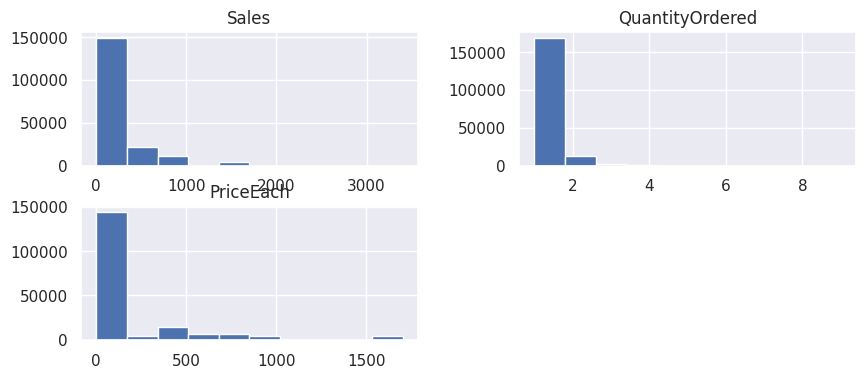

In [6]:
df[['Sales','QuantityOrdered','PriceEach']].hist()
plt.show()

In [7]:
df[['Sales','QuantityOrdered','PriceEach']].describe()

,Sales,QuantityOrdered,PriceEach
count,185687.000000,185687.000000,185687.000000
mean,185.608871,1.124553,184.523870
std,333.001558,0.443066,332.841754
min,2.990000,1.000000,2.990000
25%,11.950000,1.000000,11.950000
50%,14.950000,1.000000,14.950000
75%,150.000000,1.000000,150.000000
max,3400.000000,9.000000,1700.000000


**Vérification de la présence des Outliers**

In [8]:
def displayOutliers(data):
    sns.boxplot(data)
    plt.show()

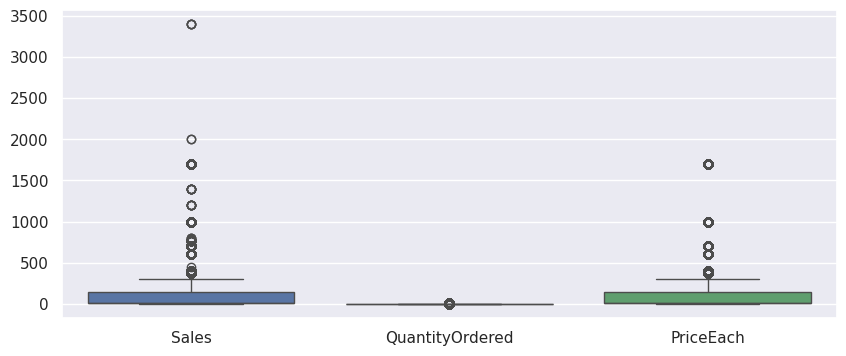

In [9]:
displayOutliers(df[['Sales','QuantityOrdered','PriceEach']])

Nous notons la présence des valeurs aberantes, donc la methode

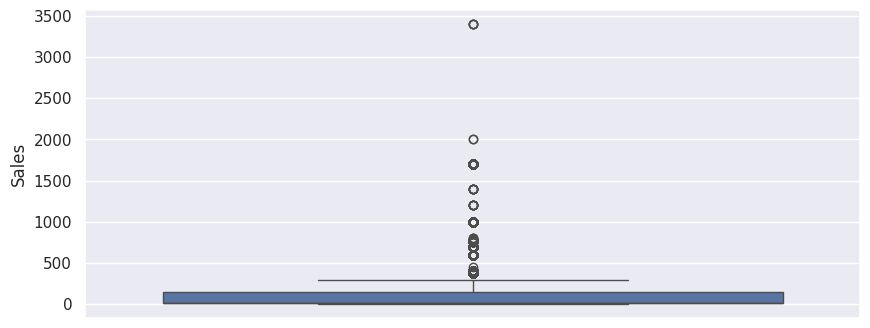

In [10]:
displayOutliers(df['Sales'])

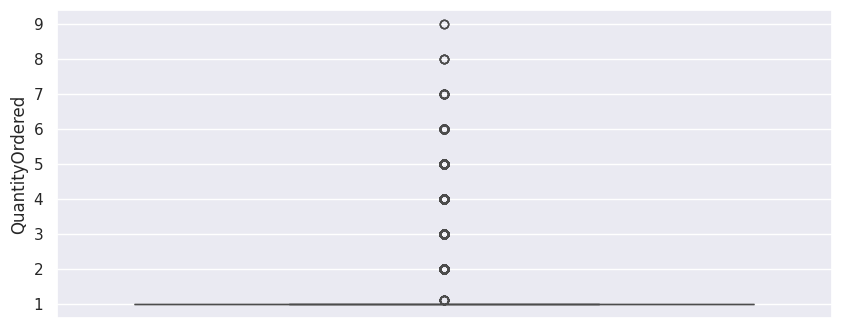

In [11]:
displayOutliers(df['QuantityOrdered'])

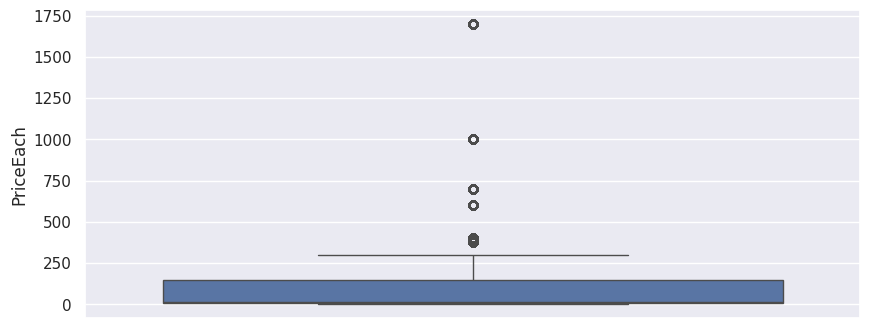

In [12]:
displayOutliers(df['PriceEach'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185687 entries, 0 to 185686
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sales            185687 non-null  float64
 1   QuantityOrdered  185687 non-null  float64
 2   PriceEach        185687 non-null  float64
dtypes: float64(3)
memory usage: 4.3 MB


Vue que les données sont non gaussiennes donc ne suit pas la loi normale, donc on peut utiliser la methode Robus scaller sur les 3 variables

In [18]:
scaled_data = pd.DataFrame(RobustScaler().fit_transform(draft), columns=draft.columns)

In [20]:
df[['Sales','QuantityOrdered','PriceEach']].describe()

,Sales,QuantityOrdered,PriceEach
count,185687.000000,185687.000000,185687.000000
mean,185.608871,1.124553,184.523870
std,333.001558,0.443066,332.841754
min,2.990000,1.000000,2.990000
25%,11.950000,1.000000,11.950000
50%,14.950000,1.000000,14.950000
75%,150.000000,1.000000,150.000000
max,3400.000000,9.000000,1700.000000




4.   **Pour chacun des cas mentionnés dans la question précédente, indiquez si la ou les méthodes de
mise à l'échelle sélectionnées sont sensibles ou non aux valeurs aberrantes **


> Reponse: La methode robusscaler n'est pas sensible aux valeurs aberantes








1.   À votre avis, est-ce que le fait de mettre les variables à une échelle commune va avoir un impact négatif sur les analyses futures ?


> Reponse: non cela permettra juste de normaliser les differentes valeurs des variables afin qu'ells se situent dans la même plage de variable. son impact sur les analyses futures dépendra largement du type d'algorithme utilisé et des caractéristiques spécifiques des données





**Exercice 2 - La méthode groupby**

Pour chacune des questions suivantes (1, 2 et 3), représentez graphiquement les résultats obtenus, puis
interprétez-les de manière correcte:


1.   . Quel a été le meilleur mois en termes de ventes ? Combien a-t-on gagné ce mois-là ?






In [22]:
DF = pd.read_csv('salesData.csv')

In [23]:
DF.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Day,Month,Year,PurchaseAddress,Sales,City,Hour
0,295665.0,Macbook Pro Laptop,1.0,1700.00000,2019-12-30 00:01:00,30,12,2019,"136 Church St, New York City, NY 10001",1700.000000,New York City,0
1,295666.0,LG Washing Machine,1.0,600.00000,2019-12-29 07:03:00,29,12,2019,"562 2nd St, New York City, NY 10001",600.000000,New York City,7
2,295667.0,USB-C Charging Cable,1.0,184.52387,2019-12-12 18:21:00,12,12,2019,"277 Main St, New York City, NY 10001",185.608871,New York City,18
3,295668.0,27in FHD Monitor,1.0,149.99000,2019-12-22 15:13:00,22,12,2019,"410 6th St, San Francisco, CA 94016",149.990000,San Francisco,15
4,295669.0,USB-C Charging Cable,1.0,11.95000,2019-12-18 12:38:00,18,12,2019,"43 Hill St, Atlanta, GA 30301",11.950000,Atlanta,12


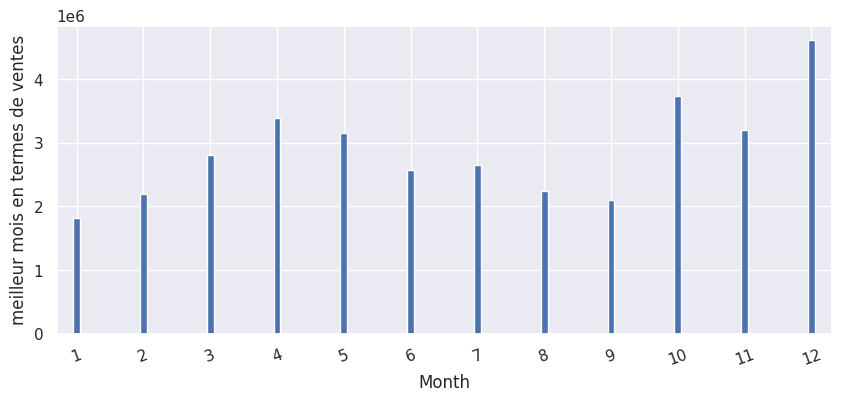

In [28]:
DF.groupby(['Month'])['Sales'].sum().plot(kind = 'bar', width = .1)
plt.xticks(rotation = 20)
plt.ylabel('meilleur mois en termes de ventes')
plt.show()

Le mailleur mois et le mois de decembre



2.   **Donnez la quantité de produits commandés par heure**





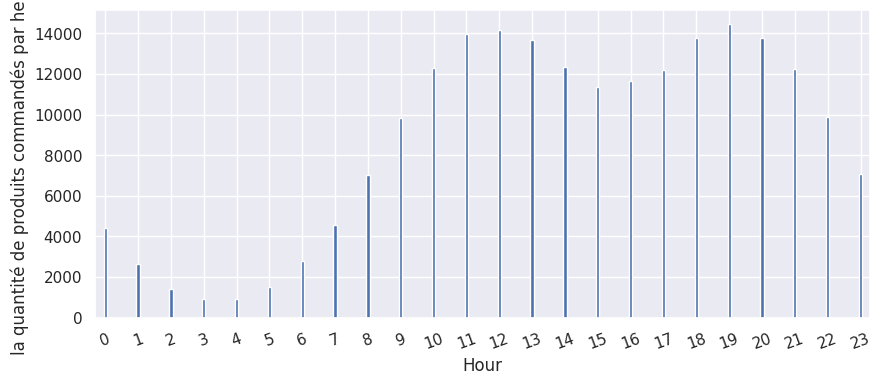

In [29]:
DF.groupby(['Hour'])['QuantityOrdered'].sum().plot(kind = 'bar', width = .1)
plt.xticks(rotation = 20)
plt.ylabel('la quantité de produits commandés par heure')
plt.show()



3.   **Quelle est la ville où le nombre de ventes est le plus élevé ?**





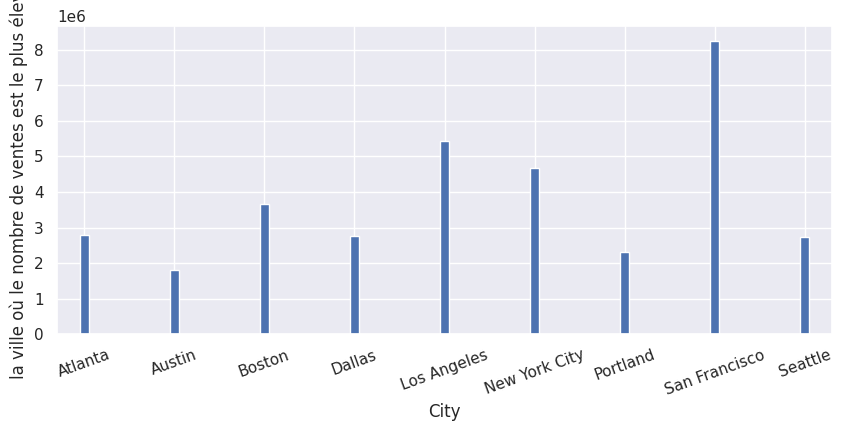

In [30]:
DF.groupby(['City'])['Sales'].sum().plot(kind = 'bar', width = .1)
plt.xticks(rotation = 20)
plt.ylabel('la ville où le nombre de ventes est le plus élevé')
plt.show()

**la ville où le nombre de ventes est le plus élevé est Sans Francisco**



5.   Interprétation du graphique:

*   la couleur jaune montre qu'il y a une forte correlation avec les variables et les correlations sont positives
*   la couleur bleue: montre qu'il y a un faible correlation entre les variables et qu'elle est négative
*   les chiffres 0 montrent qu'il n'a pas de correlation entre les variables
*   il y a une forte correlation positive entre (priceEach et sales)
*   il y a une forte correlation positive entre (sales et sales)
*   il y a une forte correlation positive entre (year et year)
*   il y a une forte correlation positive entre (Orderid et month)
*   il y a une forte correlation positive entre (month et month)
*   il y a une forte correlation positive entre (day et day)
*   il y a une forte correlation positive entre (priceEach et priceEach)


1.  **La visualisation est-elle une science, un domaine ou une discipline ?**

> Reponse: La visualisation peut être considérée comme à la fois une science, un domaine et une discipline, selon le contexte et la perspective.

Science de la visualisation : Dans ce sens, la visualisation est considérée comme une science qui étudie les principes, les techniques et les théories derrière la représentation visuelle des données. Cela comprend la compréhension de la perception visuelle humaine, la conception d'éléments visuels efficaces, et l'exploration des méthodes pour représenter et interagir avec des données complexes.

Domaine de la visualisation : La visualisation est également un domaine d'application qui se trouve à l'intersection de divers domaines tels que l'informatique, les statistiques, la science des données, et d'autres. Dans ce sens, la visualisation est utilisée pour représenter visuellement des données dans des domaines aussi variés que la biologie, l'économie, la météorologie, la defense, etc.

Discipline de la visualisation : En tant que discipline, la visualisation englobe l'étude et la pratique de la création de représentations visuelles pour communiquer l'information de manière efficace. Cela comprend l'apprentissage des outils et des techniques de visualisation, ainsi que l'exploration des meilleures pratiques en matière de conception visuelle et d'interaction avec les données.

Donc, est un domaine interdisciplinaire qui combine des éléments de science, de technologie, d'art et de communication pour représenter et comprendre les données de manière visuelle.




